## ERP SCANR


This notebook is the overview notebook for the ERP-SCANR project (erpsc).

ERPSC is an attempt to use automated web-scraping and text mining to summarize research on ERPs. 

Hopefully this project will serve as a type of automated meta-analysis, and also a way to pull out 

Currently, two approaches:
- Co-occurence of terms analysis: check how often pre-selected cognitive terms appear in abstracts with ERP terms. 
- Words analysis: scrapes for ERP papers, pulls out words in abstracts for analysis. 

NOTE:
- Known issue: Some ERP terms often return papers where the same name is used for something else. Will need some sort of quality control procedure to check that the papers that are scraped actually refer to what is wanted. 

This notebook is runs and displays the code. The actual code is in the 'erpsc' custom module. 

In [1]:
## Imports

# Import custom code
from erpsc import *

# TEST IMPORTS
#import requests
#import nltk
#from bs4 import BeautifulSoup

In [2]:
## Things to search through - full set
erps = ['P50', 'P100', 'P200', 'P300', 'P3a', 'P3b', 'P400', 'P600', 'N50', 'N100', 'N170', 'N200', 'N2pc', 'N270', \
        'N300', 'N400', 'N600', 'MMN', 'LPC', 'CNV', 'ERN', 'ELAN', 'CPS', 'LRP', 'LDN', 'ORN', 'SEP', 'VsEP']

cog_terms = ['language', 'memory', 'attention', 'motor', 'decision making', 'vision', 'pain', \
             'auditory', 'emotion', 'categorization', 'reward', 'spatial', 'somatosensory', 'face', \
             'cognitive', 'awareness', 'tactile', 'pain', 'learning', 'reasoning', 'social', 'action']

disease_terms = ['autism', 'schizophrenia', 'parkinson', 'depression', 'anxiety', 'anorexia', 'bipolar', \
                 'psychosis', 'PTSD', 'alzheimer', 'dementia', 'ADHD', 'stroke', ]

In [2]:
# Small test set of words
erps = ['N400', 'P600']
cog_terms = ['language', 'memory']

## Co-Occurence of Term Analysis

This analysis searches through pubmed for papers that contain specified ERP and COG terms. Data extracted is the count of the number of papers with both terms. This is used to infer what cognitive terms each ERP is affiliated with. 

NOTE:
- COG terms here are a somewhat arbitrary selection: need a better set of terms, less arbitrarily selected. 

In [3]:
# Initialize object for term count co-occurences. 
term_counts = ERPSCCount()

# Set erp and cog lists as terms to use
term_counts.set_erps(erps)
term_counts.set_terms(disease_terms)

In [4]:
# Scrape the co-occurence of terms data
term_counts.scrape_data()

/Users/thomasdonoghue/anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [5]:
# Check the most commonly associated COG term for each ERP
term_counts.check_erps()

For the  P50   the most common association is 	 depression with 	 %10.71
For the  P100  the most common association is 	 depression with 	 %06.14
For the  P200  the most common association is 	 depression with 	 %09.98
For the  P300  the most common association is 	 depression with 	 %09.15
For the  P3a   the most common association is 	 schizophrenia with 	 %25.03
For the  P3b   the most common association is 	 depression with 	 %27.05
For the  P400  the most common association is 	 depression with 	 %05.42
For the  P600  the most common association is 	 bipolar    with 	 %11.38
For the  N50   the most common association is 	 depression with 	 %02.11
For the  N100  the most common association is 	 schizophrenia with 	 %26.28
For the  N170  the most common association is 	 anxiety    with 	 %20.82
For the  N200  the most common association is 	 depression with 	 %22.78
For the  N2pc  the most common association is 	 bipolar    with 	 %15.45
For the  N270  the most common association is

In [6]:
# Check the most commonly associated ERP for each term
term_counts.check_terms()

For  autism               the strongest associated ERP is 	 CNV   with 	 %20.67
For  schizophrenia        the strongest associated ERP is 	 N100  with 	 %26.28
For  parkinson            the strongest associated ERP is 	 ELAN  with 	 %07.10
For  depression           the strongest associated ERP is 	 P3b   with 	 %27.05
For  anxiety              the strongest associated ERP is 	 P3b   with 	 %21.55
For  anorexia             the strongest associated ERP is 	 SEP   with 	 %01.67
For  bipolar              the strongest associated ERP is 	 P3b   with 	 %20.86
For  psychosis            the strongest associated ERP is 	 N100  with 	 %12.34
For  PTSD                 the strongest associated ERP is 	 P3b   with 	 %03.60
For  alzheimer            the strongest associated ERP is 	 ELAN  with 	 %34.54
For  dementia             the strongest associated ERP is 	 ELAN  with 	 %34.57
For  ADHD                 the strongest associated ERP is 	 P3b   with 	 %12.58
For  stroke               the strongest 

In [7]:
# Check the terms with the most papers
term_counts.check_top()

The most studied ERP is  SEP     with    44007 papers
The most studied term is  depression  with   325060  papers


In [8]:
# Check how many papers were found for each term - ERPs
term_counts.check_counts('erp')

P50   -    41358
P100  -     7535
P200  -     2496
P300  -    28098
P3a   -     1870
P3b   -     1582
P400  -     1217
P600  -      791
N50   -     6448
N100  -     1507
N170  -     1273
N200  -     1045
N2pc  -      330
N270  -      104
N300  -      302
N400  -     2023
N600  -       62
MMN   -     8242
LPC   -     4703
CNV   -    10885
ERN   -    15725
ELAN  -     5267
CPS   -    15524
LRP   -     9042
LDN   -     1300
ORN   -     5461
SEP   -    44007
VsEP  -       59


In [9]:
# Check how many papers were found for each term - COGs
term_counts.check_counts('term')

autism             -      40584
schizophrenia      -      87121
parkinson          -      39783
depression         -     325060
anxiety            -     203861
anorexia           -      45248
bipolar            -      92698
psychosis          -      43142
PTSD               -      17570
alzheimer          -      56020
dementia           -      97140
ADHD               -      21554
stroke             -     235818


In [ ]:
# Save pickle file of results
term_counts.save_pickle()

In [ ]:
# Load from pickle file
term_counts = load_pickle_counts()

/Users/thomasdonoghue/anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


N400 :  semantic , processing , words , effect , word , results , event-related , effects , erp , study , language , participants , related , priming , showed , elicited , two , potentials , brain , information , 
P600 :  syntactic , processing , semantic , language , results , sentences , n400 , erp , event-related , elicited , sentence , effect , violations , study , effects , brain , word , two , processes , potentials , 


In [10]:
# Make a wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
wordcloud = WordCloud().generate_from_frequencies(words_analysis.results[0].freqs)

UnicodeEncodeError: 'decimal' codec can't encode character u'\u223c' in position 0: invalid decimal Unicode string

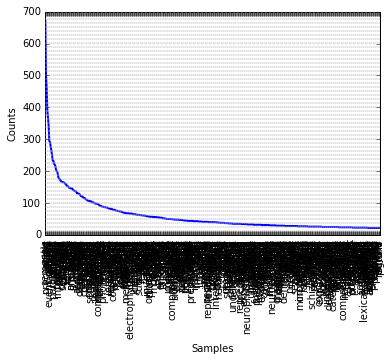

In [24]:
type(words_analysis.results[0].freqs)

words_analysis.results[0].freqs.plot(500)

In [ ]:
words_analysis.results[0].freqs

## Test Code

In [ ]:

#page = requests.get('http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&field=word&term=“N270”AND”Language”')
#page = requests.get('http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&field=word&term=“P300”&retmax=10')
page = requests.get('http://www.ncbi.nlm.nih.gov/pubmed/27354714')

page_soup = BeautifulSoup(page.content)

#counts = page_soup.find_all('count')

#for i in range(0, len(counts)):
#    count = counts[i]
#    ext = count.text
#    print int(ext)

art_page = requests.get('http://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&retmode=xml&id=' + id_strs)

art_page_soup = BeautifulSoup(art_page.content, "xml")

In [ ]:
aa = ERPC()
aa.set_path('Users')